# Task 5 : Pandas

In [1]:
import pandas as pd
import numpy as np
import re

####  1.) Load the dataset into a Pandas DataFrame and display the first 5 rows to get an idea of the data.

In [2]:
df = pd.read_csv('Sport car price.csv')

In [3]:
df.head(5)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


#### 2.) Use Pandas to clean the dataset by removing any missing or duplicate values, and converting any non-numeric data to numeric data where appropr

In [4]:
df.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [7]:
df.duplicated().sum()

288

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 707 non-null    object
 1   Car Model                707 non-null    object
 2   Year                     707 non-null    int64 
 3   Engine Size (L)          707 non-null    object
 4   Horsepower               707 non-null    object
 5   Torque (lb-ft)           707 non-null    object
 6   0-60 MPH Time (seconds)  707 non-null    object
 7   Price (in USD)           707 non-null    object
dtypes: int64(1), object(7)
memory usage: 49.7+ KB


In [11]:
# Handle Price column 
# Remove the comma and convert to numeric
df['Price (in USD)'] = df['Price (in USD)'].apply(lambda x : x.replace(',', ''))
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000


In [12]:
# Function to apply lambda to a column
def apply_lambda(col, l):
    df[col] = df[col].apply(l)

# Function to replace redundant signs in values
def replace_string(col, str1, str2):
    df[col] = df[col].apply(lambda x: str(x).replace(str1, '').replace(str2, ''))

# Apply replacements
replace_string('Horsepower', ',', '+')
replace_string('Torque (lb-ft)', '-', '+')
replace_string('Torque (lb-ft)', ',', '')
replace_string('0-60 MPH Time (seconds)', '<', '+')



In [13]:
# Remove the comma and convert to numeric
df['Price (in USD)'] = df['Price (in USD)'].apply(lambda x : x.replace(',', ''))
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000


In [14]:
df['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', '6.6', '7', '1.7', '3.3',
       '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [15]:
# Whether the car is electric
df['Electric'] = df['Engine Size (L)'].copy()
apply_lambda('Electric', lambda x : 'No' if 'Electric' not in str(x) else 'Yes')
df['Electric'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# Whether the car is hybrid
df['Hybrid'] = df['Engine Size (L)'].copy()
apply_lambda('Hybrid', lambda x : 'No' if 'Hybrid' not in str(x) else 'Yes')
df['Hybrid'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
# Remove the electric and hybrid values from Engine size
apply_lambda('Engine Size (L)', lambda x : x if len(str(x)) == 1 else re.search('\d{1}\.\d{1}', str(x)))
apply_lambda('Engine Size (L)', lambda x : x.group() if type(x) == re.Match else x)
replace_string('Engine Size (L)','-','')
df['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'None', '6.5', '3.7', '2.5', '1.5', '6.8',
       '8.4', '6.6', '7', '1.7', '3.3', '', '6.7', '1.8', '5.5', '4.0',
       '4.6', '3.6', '5.7', '2.0', '0', '6.4', '6.3', '2.3'], dtype=object)

In [18]:
replace_string('Horsepower',',','+')
replace_string('Torque (lb-ft)','-','+')
replace_string('Torque (lb-ft)',',','')
replace_string('0-60 MPH Time (seconds)','<','+')
df['0-60 MPH Time (seconds)'].unique()

array(['4', '2.8', '3', '3.2', '2.7', '3.1', '3.8', '3.5', '2.5', '2.4',
       '5.4', '4.4', '4.8', '4.7', '3.6', '4.1', '1.85', '4.5', '3.3',
       '3.9', '4.2', '3.4', '5.1', '4.3', '2.9', '5', '5.3', '4.9', '6.5',
       '3.7', '1.95', '1.9', '2.6', '2.3', '4.6', '1.98', ' 1.9', '2.1',
       '5.2', '1.8', '2.2', '6.4', '2'], dtype=object)

In [19]:
df.iloc[:,3:8] = df.iloc[:,3:8].apply(pd.to_numeric, errors = 'coerce')
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Electric,Hybrid
0,Porsche,911,2022,3.0,379,331.0,4.0,101200,No,No
1,Lamborghini,Huracan,2021,5.2,630,443.0,2.8,274390,No,No
2,Ferrari,488 GTB,2022,3.9,661,561.0,3.0,333750,No,No
3,Audi,R8,2022,5.2,562,406.0,3.2,142700,No,No
4,McLaren,720S,2021,4.0,710,568.0,2.7,298000,No,No


In [20]:
df['Engine Size (L)'].isna().sum()

38

In [21]:
mean = df['Engine Size (L)'].mean()
print(mean)

4.41913303437967


In [22]:
df['Engine Size (L)'] = df['Engine Size (L)'].fillna(mean)

In [23]:
df['Engine Size (L)'].isna().sum()

0

In [24]:
df['Torque (lb-ft)'].isna().sum() 

1

In [25]:
mean = df['Torque (lb-ft)'].mean()
print(mean)

564.4036827195467


In [26]:
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].fillna(mean)

In [27]:
df['Torque (lb-ft)'].isna().sum() 

0

In [28]:
df['Engine Size (L)'] = df['Engine Size (L)'].astype(int)
df['Horsepower'] = df['Horsepower'].astype(int)
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].astype(int)
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].astype(int)
df['Price (in USD)'] = df['Price (in USD)'].astype(int)



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 0 to 1006
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 707 non-null    object
 1   Car Model                707 non-null    object
 2   Year                     707 non-null    int64 
 3   Engine Size (L)          707 non-null    int32 
 4   Horsepower               707 non-null    int32 
 5   Torque (lb-ft)           707 non-null    int32 
 6   0-60 MPH Time (seconds)  707 non-null    int32 
 7   Price (in USD)           707 non-null    int32 
 8   Electric                 707 non-null    object
 9   Hybrid                   707 non-null    object
dtypes: int32(5), int64(1), object(4)
memory usage: 46.9+ KB


#### 3.) Use Pandas to explore the dataset by computing summary statistics for each column, such as mean, median, mode, standard deviation, and range.

In [30]:
df.describe()

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,707.000000,707.000000,707.000000,707.000000,707.000000,7.070000e+02
mean,2021.151344,4.130127,631.937765,564.403112,3.063649,3.808800e+05
std,2.347564,1.477896,463.852810,502.710035,0.887540,7.652793e+05
min,1965.000000,0.000000,181.000000,151.000000,1.000000,2.500000e+04
25%,2021.000000,3.000000,454.000000,398.000000,3.000000,7.000000e+04
50%,2021.000000,4.000000,591.000000,505.000000,3.000000,1.324000e+05
75%,2022.000000,5.000000,710.000000,626.500000,4.000000,2.250000e+05
max,2023.000000,8.000000,10000.000000,10000.000000,6.000000,5.200000e+06


#### 4.) Use Pandas to group the dataset by car make and compute the average price for each make.

In [31]:
# Group by 'Car Make' and calculate the average price
average_price = df.groupby('Car Make')['Price (in USD)'].mean()

# Print the result
print(average_price)


Car Make
Acura            1.581650e+05
Alfa Romeo       7.459967e+04
Alpine           7.150000e+04
Ariel            7.500000e+04
Aston Martin     2.224352e+05
Audi             9.135337e+04
BMW              8.064097e+04
Bentley          2.161760e+05
Bugatti          3.386333e+06
Chevrolet        5.465270e+04
Dodge            7.166649e+04
Ferrari          3.000600e+05
Ford             2.328552e+05
Jaguar           7.643810e+04
Kia              5.220000e+04
Koenigsegg       2.900000e+06
Lamborghini      4.732617e+05
Lexus            9.383333e+04
Lotus            6.072589e+05
Maserati         1.464203e+05
Mazda            2.683000e+04
McLaren          3.216477e+05
Mercedes-AMG     1.538000e+05
Mercedes-Benz    1.615324e+05
Nissan           4.681161e+04
Pagani           2.809091e+06
Pininfarina      2.500000e+06
Polestar         1.550000e+05
Porsche          1.350485e+05
Rimac            2.400000e+06
Rolls-Royce      3.335944e+05
Shelby           1.000000e+06
Subaru           3.817000e+04
T

#### 5.) Use Pandas to group the dataset by year and compute the average horsepower for each year.


In [32]:
avg_horsepower = df.groupby('Year')['Horsepower'].mean()
print(avg_horsepower)

Year
1965    435.000000
2014    622.000000
2015    660.400000
2017    645.000000
2019    615.333333
2020    462.083333
2021    628.527778
2022    651.601504
2023    675.000000
Name: Horsepower, dtype: float64


#### 6.) Use Pandas to create a scatter plot of price versus horsepower, and add a linear regression line to the plot.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

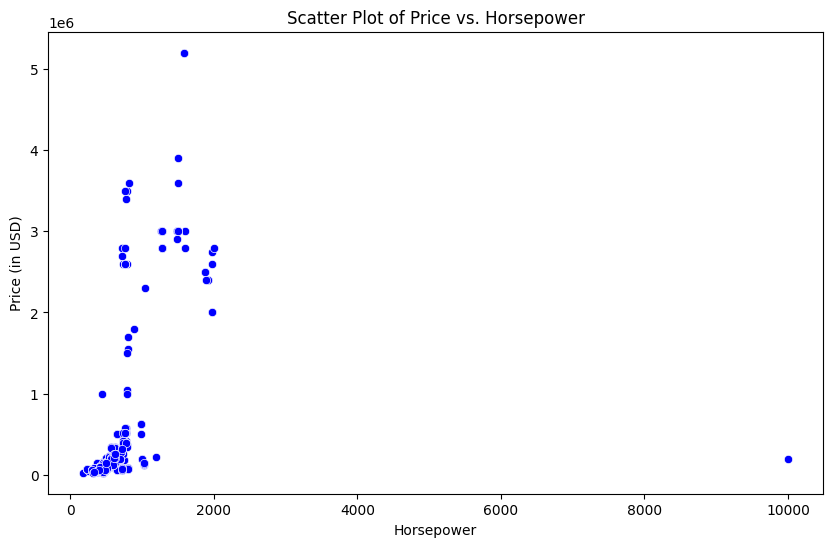

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horsepower', y='Price (in USD)', data=df, color='blue')
plt.title('Scatter Plot of Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price (in USD)')
plt.show()


#### 7.) Use Pandas to create a histogram of the 0-60 MPH times in the dataset, with bins of size 0.5 seconds.

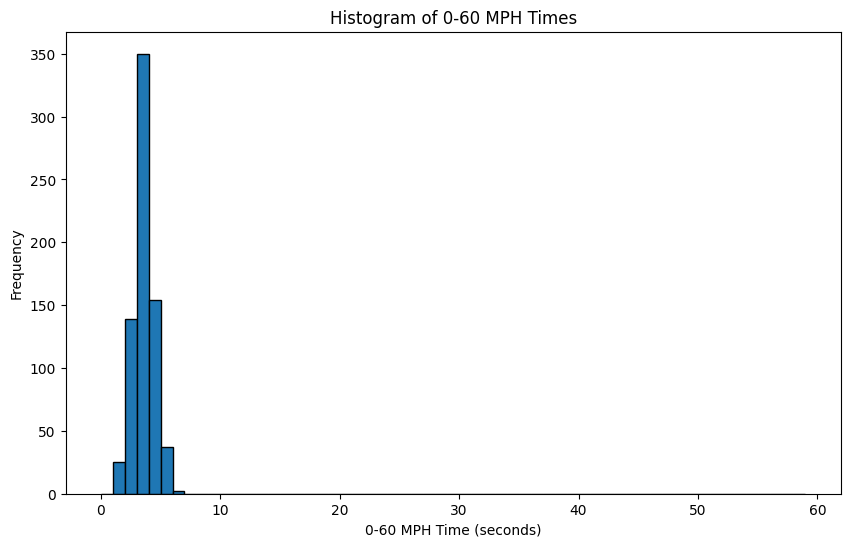

In [35]:
plt.figure(figsize=(10, 6))
df['0-60 MPH Time (seconds)'].plot.hist(bins=range(0, 60), edgecolor='black')

# Add titles and labels
plt.title('Histogram of 0-60 MPH Times')
plt.xlabel('0-60 MPH Time (seconds)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### 8.) Use Pandas to filter the dataset to only include cars with a price greater than 500,000, and then sort the resulting dataset by horsepower in descending order.

In [36]:
filtered_df = df[df['Price (in USD)'] > 500000]
sorted_df = filtered_df.sort_values(by='Horsepower', ascending=False)
print(sorted_df)

         Car Make  Car Model  Year  Engine Size (L)  Horsepower  \
877         Lotus      Evija  2021                4        2000   
420         Lotus      Evija  2022                4        1973   
987         Lotus      Evija  2022                4        1973   
523         Lotus      Evija  2022                4        1973   
1003        Lotus      Evija  2021                4        1972   
...           ...        ...   ...              ...         ...   
318        Pagani     Huayra  2021                6         730   
194   Lamborghini  Aventador  2021                6         730   
166        Pagani     Huayra  2020                6         720   
24         Pagani     Huayra  2021                6         720   
170        Shelby      Cobra  1965                7         435   

      Torque (lb-ft)  0-60 MPH Time (seconds)  Price (in USD) Electric Hybrid  
877             1254                        2         2800000      Yes     No  
420             1254               

#### 9.) Use Pandas to export the cleaned and transformed dataset to a new CSV file.

In [37]:
sorted_df = filtered_df.sort_values(by='Horsepower', ascending=False)
sorted_df.to_csv('cleaned.csv', index=False)

# Task 1.  LISTS

#### 1.)  Write a Python program to multiply all the items in a list.

In [338]:
def multiply(x):
    product = 1
    for i in x:
        product = i*i
    return product

# Example usage
y = [1, 2, 3, 4, 5]
res = multiply(y)
print(f"The product of all items in the list is: {res}")


The product of all items in the list is: 25


#### 2.) Write a Python program to get the largest number from a list.

In [344]:
def largest(x):
    largest = x[0]
    for i in x[1:]:
        if i > largest:
            largest = i
    return largest

# Example usage
i = [10, 20, 4, 45, 99]
largest_number = largest(i)
print(f"The largest number in the list is: {largest_number}")


The largest number in the list is: 99


#### 3.)  Write a Python program to get the smallest number from a list.

In [346]:
def smallest(x):
    smallest = x[0]
    for i in x[1:]:
        if i < smallest:
            smallest = i
    return smallest

# Example usage
i = [10, 20, 4, 45, 99]
smallest_number = smallest(i)
print(f"The smallest_number in the list is: {smallest_number}")

The smallest_number in the list is: 4


#### 4.) Write a Python program to get a list, sorted in increasing order by the last element in each tuple from a given list of non-empty tuples. 
## (Can't Understand question)

#### 5.) Write a Python program to remove duplicates from a list.

In [350]:
def remove_duplicates(x):
    unique_list = []
    for i in x:
        if i not in unique_list:
            unique_list.append(i)  
    return unique_list

# Example usage
y = [1, 2, 3, 2, 4, 5, 1, 6]
unique_list = remove_duplicates(y)
print(f"List after removing duplicates: {unique_list}")


List after removing duplicates: [1, 2, 3, 4, 5, 6]


#### 6.) Write a Python program to check if a list is empty or not.

In [351]:
def is_empty(x):
    return len(x) == 0

# Example usage
y = []

if is_empty(y):
    print("The list is empty.")
else:
    print("The list is not empty.")


The list is empty.


#### 7.)  Write a Python program to count the lowercase letters in a given list of word

In [355]:
def count(x):
    count = 0
    for i in x:
        for char in x:
            if char.islower():
                count += 1
    return count

# Example usage
words = ['MY','name', 'IS','HARSH']
lowercase_count = count(words)
print(f"Total number of lowercase letters: {lowercase_count}")


Total number of lowercase letters: 4


#### 8.) Write a Python program to extract specified number of elements from a given list, which follows each other continuously. Original list:  [1, 1, 3, 4, 4, 5, 6, 7]

#### 9.)  Write a Python program to find the largest odd number in a given list of integers.

In [365]:
def largest_odd_number(x):
    num = 0
    
    for i in x:
        if i % 2 != 0:  # Check if the number is odd
            if num is 0 or i > num:
                num = i
   
    return num

# Example usage
sample_data1 = [0, 9, 2, 4, 5, 6]
print(f"Largest odd number in  {largest_odd_number(sample_data1)}")

Largest odd number in  9


<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Harsh\AppData\Local\Temp\ipykernel_39540\519766318.py:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num is 0 or i > num:


# Task 2. TUPLES

#### 1.) Write a Python program to create a tuple with different data types.


In [40]:
tuple = (1, "Hello", 3.14, True,'Sabudh Foundation')
print(tuple)
print(type(tuple))


(1, 'Hello', 3.14, True, 'Sabudh Foundation')
<class 'tuple'>


#### 2.) Create a Tuple of Numbers and Print One Item

In [41]:
tuple = (1, "Hello", 3.14, True,'Sabudh Foundation')
print(tuple[1])
print(type(tuple))

Hello
<class 'tuple'>


#### 3.) Add an Item to a Tuple

In [42]:
tuple = (1, "Hello", 3.14, True,'Sabudh Foundation')
new_tuple = tuple + (4,)
print(new_tuple)
print(type(tuple))

(1, 'Hello', 3.14, True, 'Sabudh Foundation', 4)
<class 'tuple'>


#### 4.) Get the 4th Element from the Last Element of a Tuple

In [44]:
tuple = (1, "Hello", 3.14, True,'Sabudh Foundation')
print(tuple[-4])
print(type(tuple))

Hello
<class 'tuple'>


#### 5.)  Convert a Tuple to a Dictionary

In [83]:
tuple = (('name','harsh'),('age',22))
print(dict)
print(type(dict))

(('name', 'harsh'), ('age', 22))
<class 'tuple'>


# Task 3. DICTIONARY:

#### 1. Sort a Dictionary by Value (Ascending and Descending)

In [65]:
# Sample dictionary
my_dict = {'a': 3, 'b': 1, 'c': 2}

# Sort in ascending order by value
asc = sorted(my_dict.items(), key=lambda item: item[1])
# Sort in descending order by value
desc = sorted(my_dict.items(), key=lambda item: item[1], reverse=True)

# Print the sorted dictionaries
print("Ascending Order:", asc)
print("Descending Order:", desc)



Ascending Order: [('b', 1), ('c', 2), ('a', 3)]
Descending Order: [('a', 3), ('c', 2), ('b', 1)]


#### 2. Iterate Over Dictionaries Using for Loops

In [56]:
# Sample dictionary
my_dict = {'name': 'Harsh', 'age': 22, 'location': 'Ludhiana'}

# Iterating over keys and values
for key, value in my_dict.items():
    print(f"{key}: {value}")


name: Harsh
age: 22
location: Ludhiana


#### 3. Merge Two Python Dictionaries

In [57]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'c': 3, 'd': 4}

# Merging dictionaries
merged_dict = {**dict1, **dict2}

print("Merged Dictionary:", merged_dict)


Merged Dictionary: {'a': 1, 'b': 2, 'c': 3, 'd': 4}


#### 4. Sum All the Items in a Dictionary

In [59]:
sample_dict = {'a': 100, 'b': 200, 'c': 300}

# Summing all the values
total_sum = sum(sample_dict.values())

print("Total Sum:", total_sum)


Total Sum: 600


#### 5. Write a Python program to multiply all the items in a dictionary.

In [60]:
sample_dict = {'a': 100, 'b': 200, 'c': 300}

# Multiplying all the values
total_product = 1
for value in sample_dict.values():
    total_product *= value

print("Total Product:", total_product)


Total Product: 6000000


#### 6. Write a Python program to sort a given dictionary by key.

In [64]:
# Sample dictionary
sample_dict = {'b': 2, 'a': 1, 'c': 3}

# Sorting the dictionary by key
sorted_dict = sorted(sample_dict.items())

print("Sorted Dictionary by Key:", sorted_dict)



Sorted Dictionary by Key: [('a', 1), ('b', 2), ('c', 3)]


#### 7. Write a Python program to remove duplicates from the dictionary.

In [66]:
# Sample dictionary with duplicates
sample_dict = {'a': 1, 'b': 2, 'c': 1, 'd': 2}

# Removing duplicates
seen_values = set()
unique_dict = {}

for key, value in sample_dict.items():
    if value not in seen_values:
        unique_dict[key] = value
        seen_values.add(value)

print("Dictionary :", unique_dict)


Dictionary After Removing Duplicates: {'a': 1, 'b': 2}


# Task 4. Numpy

## 1: Numpy array creation and manipulation

In [70]:

# 1. Create a 1D Numpy array 'a' containing 10 random integers between 0 and 99
a = np.random.randint(0, 100, size=10)

print("Array 'a'", a)

# 2. Create a 2D Numpy array 'b' of shape (3, 4) containing random integers between -10 and 10
b = np.random.randint(-10, 11, size=(3, 4))

print("Array 'b'")
print(b)

# 3. Reshape 'b' into a 1D Numpy array 'b_flat'
b_flat = b.flatten()

print("Array 'b_flat'", b_flat)

# 4. Create a copy of 'a' called 'a_copy', and set the first element of 'a_copy' to -1
a_copy = a.copy()
a_copy[0] = -1

print("Array 'a_copy'", a_copy)

# 5. Create a 1D Numpy array 'c' containing every second element of 'a'
c = a[::2]

print("Array 'c'", c)


Array 'a' [30  4 20 53 64 39 92 90 78 32]
Array 'b'
[[ -4   8  -7   0]
 [-10  -7  -2   3]
 [  9   2 -10   2]]
Array 'b_flat' [ -4   8  -7   0 -10  -7  -2   3   9   2 -10   2]
Array 'a_copy' [-1  4 20 53 64 39 92 90 78 32]
Array 'c' [30 20 64 92 78]


## 2: Numpy array indexing and slicing

In [69]:

a = np.random.randint(0, 100, size=10)
b = np.random.randint(-10, 11, size=(3, 4))

# Print the third element of 'a'
print("Third element of 'a' ", a[2])

# Print the last element of 'b'
print("Last element of 'b' ", b[-1, -1])

# Print the first two rows and last two columns of 'b'
print("First two rows and last two columns of 'b':")
print(b[:2, -2:]) # :2 for starting -2: for last here : use to select all

# Assign the second row of 'b' to a variable called 'b_row'
b_row = b[1, :]
print("Second row of 'b' ", b_row)

# Assign the first column of 'b' to a variable called 'b_col'
b_col = b[:, 0]
print("First column of 'b' ", b_col)


Third element of 'a'  95
Last element of 'b'  9
First two rows and last two columns of 'b':
[[-7  7]
 [ 7  2]]
Second row of 'b'  [-1 -7  7  2]
First column of 'b'  [ 2 -1 -6]


##  3: Numpy array operations

In [76]:
# 1. Create a 1D Numpy array 'd' containing the integers from 1 to 10
d = np.arange(1, 11)
print("Array 'd'", d)

# 2. Add 'a' and 'd' element-wise to create a new Numpy array 'e'
e = a + d[:10]  
print("Array 'e' (a + d):", e)

# 3. Multiply 'b' by 2 to create a new Numpy array 'b_double'
b_double = b * 2

print("Array 'b_double':")
print(b_double)

# 4. Calculate the dot product of 'b' and 'b_double' to create a new Numpy array 'f'
# For dot product, flatten both arrays to ensure the operation is valid
b_flat = b.flatten()
b_double_flat = b_double.flatten()
f = np.dot(b_flat, b_double_flat)

print("Dot product of 'b' and 'b_double'", f)

Array 'd' [ 1  2  3  4  5  6  7  8  9 10]
Array 'e' (a + d): [31  6 23 57 69 45 99 98 87 42]
Array 'b_double':
[[ -8  16 -14   0]
 [-20 -14  -4   6]
 [ 18   4 -20   4]]
Dot product of 'b' and 'b_double' 960
